In [18]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt


df=pd.read_csv("../data_formatted/training_dataset.csv",low_memory=False)
df.match_date = df.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

df = df.dropna()
df = df[(df.player1_plays > 6) & (df.player2_plays>6)]
df.shape

(36972, 36)

In [19]:
from sklearn.model_selection import train_test_split

X = df[["player1_name", "player1_age", "player1_atprank", "player1_plays", "player1_wins", "player1_losses", "player1_elo", "player1_mean_serve_rating", "player1_mean_atp_adversary", "player1_height", "player1_weight", "player1_oddsB365",
        "player2_name", "player2_age", "player2_atprank", "player2_plays", "player2_wins", "player2_losses", "player2_elo", "player2_mean_serve_rating", "player2_mean_atp_adversary", "player2_height", "player2_weight", "player2_oddsB365",
        "match_date","winner_player1"]]
y = df.winner_player1
#y = np.where(((df.player1_oddsB365 > df.player2_oddsB365) & (df.winner_player1==1)) | ((df.player1_oddsB365 < df.player2_oddsB365) & (df.winner_player1==0)),1,0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)# shuffle=False)


In [20]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([18500, 18472], dtype=int64))

In [21]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler 

col_to_drop = ["player1_name", "player2_name", "match_date","winner_player1","player1_oddsB365","player2_oddsB365"]
X_train_filtered = X_train.drop(col_to_drop,axis=1)
X_test_filtered = X_test.drop(col_to_drop,axis=1)

scaler = MinMaxScaler()
scaler.fit(X_train_filtered[["player1_plays", "player2_plays","player1_elo","player2_elo"]])
X_train_filtered[["player1_plays","player2_plays", "player1_elo","player2_elo"]] = scaler.transform(X_train_filtered[["player1_plays","player2_plays", "player1_elo","player2_elo"]])
X_test_filtered[["player1_plays","player2_plays", "player1_elo","player2_elo"]] = scaler.transform(X_test_filtered[["player1_plays","player2_plays", "player1_elo","player2_elo"]])

#scaler = StandardScaler()
#scaler.fit(X_train_filtered)
#X_train_filtered = scaler.transform(X_train_filtered)
#X_test_filtered = scaler.transform(X_test_filtered)

X_train_filtered = pd.DataFrame(X_train_filtered)
X_test_filtered = pd.DataFrame(X_test_filtered)

X_train_filtered.head()

,player1_age,player1_atprank,player1_plays,player1_wins,player1_losses,player1_elo,player1_mean_serve_rating,player1_mean_atp_adversary,player1_height,player1_weight,player2_age,player2_atprank,player2_plays,player2_wins,player2_losses,player2_elo,player2_mean_serve_rating,player2_mean_atp_adversary,player2_height,player2_weight
41744,20.553046,121.0,0.003478,2,9,0.162676,232.062500,111.194444,188.0,90.0,22.072553,195.0,0.025152,13,23,0.161820,270.162207,74.881271,185.0,82.0
5942,24.076660,39.0,0.057391,43,30,0.248619,260.669048,75.227519,185.0,83.0,23.994524,86.0,0.072853,58,33,0.243121,268.094549,60.504702,193.0,88.0
37007,27.115674,67.0,0.031304,18,25,0.195212,264.500000,86.587778,183.0,79.0,19.794661,147.0,0.009540,5,13,0.152439,256.675000,124.907692,188.0,75.0
13576,25.396304,6.0,0.240000,162,121,0.490485,261.746229,80.625803,178.0,72.0,27.693361,135.0,0.068517,34,52,0.164947,288.463235,91.756787,196.0,91.0
5695,24.240931,12.0,0.083478,57,46,0.292357,250.912338,69.500000,183.0,80.0,24.802190,42.0,0.079792,56,43,0.239212,279.044589,62.054194,193.0,92.0


Epoch 1/20
592/592 [==============================] - 1s 865us/step - loss: 2.3831 - accuracy: 0.5623 - val_loss: 1.0187 - val_accuracy: 0.5820
Epoch 2/20
592/592 [==============================] - 0s 723us/step - loss: 0.9397 - accuracy: 0.5918 - val_loss: 0.8436 - val_accuracy: 0.6111
Epoch 3/20
592/592 [==============================] - 0s 729us/step - loss: 0.8331 - accuracy: 0.5971 - val_loss: 0.8508 - val_accuracy: 0.5924
Epoch 4/20
592/592 [==============================] - 0s 748us/step - loss: 0.7582 - accuracy: 0.6074 - val_loss: 0.7006 - val_accuracy: 0.6211
Epoch 5/20
592/592 [==============================] - 0s 715us/step - loss: 0.7345 - accuracy: 0.6134 - val_loss: 0.8251 - val_accuracy: 0.5963
Epoch 6/20
592/592 [==============================] - 0s 728us/step - loss: 0.7343 - accuracy: 0.6091 - val_loss: 0.7475 - val_accuracy: 0.5947
Epoch 7/20
592/592 [==============================] - 0s 717us/step - loss: 0.7330 - accuracy: 0.6095 - val_loss: 0.7490 - val_accuracy:

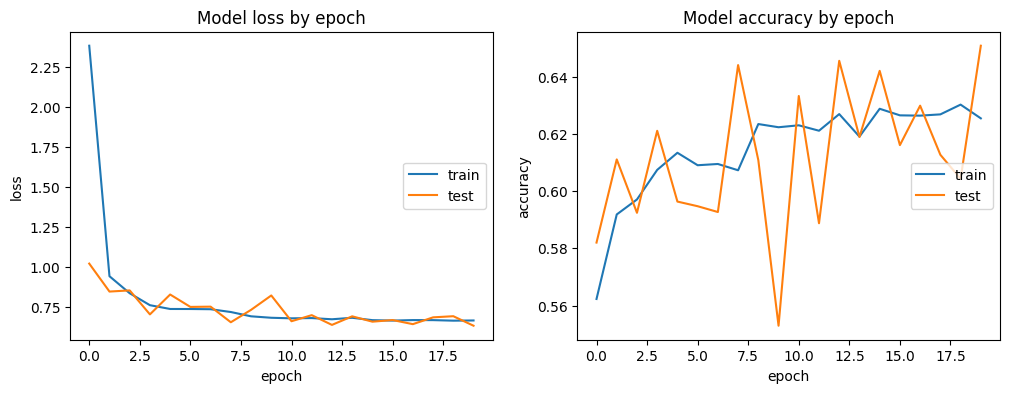

In [22]:
import keras
from keras.layers import Dense
import matplotlib.pyplot as plt

model = keras.Sequential()
model.add(Dense(X_train_filtered.shape[1], activation='relu'))
model.add(Dense(X_train_filtered.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_filtered, y_train,                        # Training dataset
                        epochs = 20,                         # Number of epochs
                        batch_size = 50,                     # Len of batch
                        validation_data=(X_test_filtered, y_test))    # Validation dataset

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test_filtered)
print('Accuracy :', accuracy_score(y_predict.round(), y_test))

232/232 [==============================] - 0s 458us/step
Accuracy : 0.6508451656524679


In [24]:
df_roi = X_test.copy()
df_roi["y_predict_proba"] = y_predict   #all rows, first column = prediction score for winner 1 
df_roi["y_predict"] = y_predict.round()
df_roi["y_test"] = y_test

df_roi["proba_bookmaker"] = (1/df_roi.player1_oddsB365).round()
df_roi[["player1_name","player1_oddsB365","player2_name","player2_oddsB365", "winner_player1","proba_bookmaker","y_predict","y_predict_proba"]]


,player1_name,player1_oddsB365,player2_name,player2_oddsB365,winner_player1,proba_bookmaker,y_predict,y_predict_proba
31197,Roger Federer,1.08,Radek Stepanek,8.00,1,1.0,1.0,0.796065
42472,David Ferrer,1.53,Pablo Carreno Busta,2.37,0,1.0,0.0,0.276802
12762,David Ferrer,1.36,Jiri Novak,3.00,1,1.0,1.0,0.653894
39065,Marin Cilic,1.12,Donald Young,6.00,1,1.0,1.0,0.657277
10615,Max Mirnyi,1.36,Justin Gimelstob,3.00,1,1.0,1.0,0.748641
...,...,...,...,...,...,...,...,...
40706,Yuki Bhambri,3.00,Sam Querrey,1.36,0,0.0,0.0,0.158683
13715,Igor Kunitsyn,6.00,Lleyton Hewitt,1.11,1,0.0,0.0,0.163770
32081,Robby Ginepri,2.00,Alejandro Falla,1.72,1,0.0,0.0,0.278729
50170,Arthur Rinderknech,3.40,Pablo Carreno Busta,1.33,1,0.0,0.0,0.370652


In [25]:
# ROI return of investment on all games
print("We bet 1€ on all test matches")
df_roi = X_test.copy()
df_roi["y_predict_proba"] = y_predict   #all rows, first column = prediction score for winner 1 
df_roi["y_predict"] = y_predict.round()
df_roi["y_test"] = y_test
df_roi["proba_bookmaker"] = (1/df_roi.player1_oddsB365).round()

#df_roi= df_roi.loc[df_roi["y_predict_proba"]]

money_invested=df_roi.shape[0]

money_won = 0.0
for index, row in df_roi.iterrows():
    if (((row.player1_oddsB365 > row.player2_oddsB365) & (row.winner_player1 ==1) & (row.y_predict == 1) ) | ((row.player1_oddsB365 < row.player2_oddsB365) & (row.winner_player1 ==1) & (row.y_predict == 0))) :
        if row.winner_player1 == 0:
            money_won += row.player2_oddsB365
        else:
            money_won += row.player1_oddsB365

print("money spent:", money_invested,"€")
print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won - money_invested, 2),"€")
print("ROI:", round(money_won*100/money_invested,2),"%")

We bet 1€ on all test matches
money spent: 7395 €
money won: 1276.0 €
TOTAL: -6119.0 €
ROI: 17.25 %
